# 必要なモジュールのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# データセットの読み込み

In [2]:
flow_data = pd.read_csv('traffic_dataset.csv')
flow_data
# srcip: クライアントIPアドレス
# dstip: サーバーIPアドレス
# proto: プロトコル (6:TCP, 17:UDP)
# bytes_r: セッションの合計受信バイト数
# bytes_r_max: セッション内の最大受信バイト数
# first: 最初のセッションの開始時間
# last: 最後のセッションの終了時間
# pkts_r: 合計受信パケット数
# count: セッション数
# activity: それぞれのセッションにつけられたラベル, countの数だけラベルが存在
# ss_time: セッション時間 (last - first)
# service: サービスのラベル

,srcip,dstip,proto,bytes_r,bytes_r_max,bytes_s,bytes_s_max,first,last,pkts_r,pkts_r_max,pkts_s,pkts_s_max,count,activity,ss_time,service
0,10.145.167.113,192.124.233.66,6,14925277,14925277,73199,73199,31:14.9,31:38.4,11755,11755,928,928,1,['watch_video'],23.467695,netflix
1,10.145.167.113,23.246.3.157,6,3539743,3539743,40324,40324,31:14.1,31:38.3,2804,2804,452,452,1,['watch_video'],24.219852,netflix
2,10.145.167.113,23.246.3.206,6,1124879,1124879,16168,16168,31:13.9,31:14.8,889,889,266,266,1,['watch_video'],0.942671,netflix
3,10.145.167.113,35.161.50.134,6,25327,25327,9713,9713,31:11.4,31:12.5,28,28,26,26,1,['watch_video'],1.129151,netflix
4,10.145.167.113,52.89.124.203,6,29610,29610,38031,38031,31:11.4,31:15.9,52,52,67,67,1,['watch_video'],4.498797,netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,10.145.31.196,69.195.172.128,6,4388,4388,1311,1311,26:59.1,27:00.5,10,10,11,11,1,['send_message'],1.447454,twitter
3133,10.145.31.196,69.195.176.128,6,4367,4367,1310,1310,28:33.5,28:34.3,10,10,11,11,1,['send_message'],0.803024,twitter
3134,10.145.31.196,69.195.178.128,6,4369,4369,1258,1258,28:39.2,28:39.5,10,10,10,10,1,['send_message'],0.269607,twitter
3135,10.145.31.196,69.195.183.128,6,0,0,180,180,30:40.5,30:43.5,0,0,3,3,1,['send_message'],3.004938,twitter


# データセットの分析

In [3]:
# 欠損値の確認
flow_data.isnull().sum()

srcip          0
dstip          0
proto          0
bytes_r        0
bytes_r_max    0
bytes_s        0
bytes_s_max    0
first          0
last           0
pkts_r         0
pkts_r_max     0
pkts_s         0
pkts_s_max     0
count          0
activity       0
ss_time        0
service        0
dtype: int64

In [4]:
# ユニークなラベルを確認
flow_data.service.unique()

array(['netflix', 'gmail', 'spotify', 'twitter'], dtype=object)

In [5]:
# データセットの各カラムの統計量を確認
flow_data.describe()

,proto,bytes_r,bytes_r_max,bytes_s,bytes_s_max,pkts_r,pkts_r_max,pkts_s,pkts_s_max,count,ss_time
count,3137.000000,3.137000e+03,3.137000e+03,3.137000e+03,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,6.157794,1.606474e+06,6.239317e+05,3.398978e+04,17068.905324,1298.854319,506.671342,232.307300,108.397514,2.306025,638.573233
std,1.308198,1.092314e+07,3.408007e+06,1.051731e+05,47869.821739,8546.803956,2670.801371,1032.807859,399.189676,3.085217,974.257106
min,6.000000,0.000000e+00,0.000000e+00,5.100000e+01,51.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,4.427000e+03,4.368000e+03,1.320000e+03,1295.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.291130
50%,6.000000,1.336500e+04,7.091000e+03,3.883000e+03,2199.000000,26.000000,13.000000,27.000000,13.000000,1.000000,24.411927
75%,6.000000,1.012320e+05,6.470300e+04,1.771800e+04,9870.000000,126.000000,69.000000,111.000000,61.000000,2.000000,1136.823697
max,17.000000,1.583393e+08,5.759676e+07,2.395860e+06,791226.000000,124816.000000,45593.000000,34030.000000,10462.000000,28.000000,3566.251350


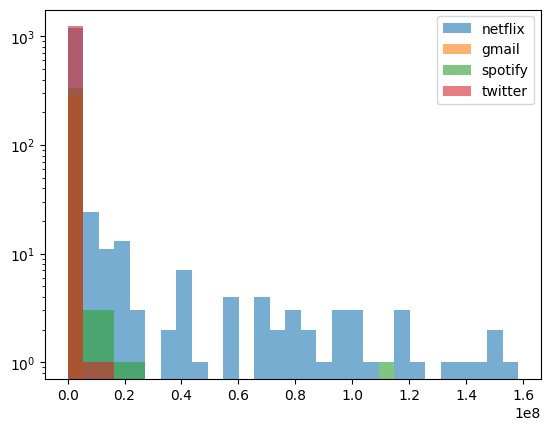

In [6]:
# 最大値と最小値の間をn_bin等分した幅でヒストグラムの棒を表示するように設定（各targetのbin幅を統一する）
n_bin = 30
x_max = flow_data['bytes_r'].max()
x_min = flow_data['bytes_r'].min()
bins = np.linspace(x_min, x_max, n_bin)

# histgramの作成. データの分布を確認
for service in flow_data.service.unique():
  plt.hist(flow_data[flow_data['service'] == service]['bytes_r'], bins=bins, log=True, label=service, alpha=0.6)

plt.legend()

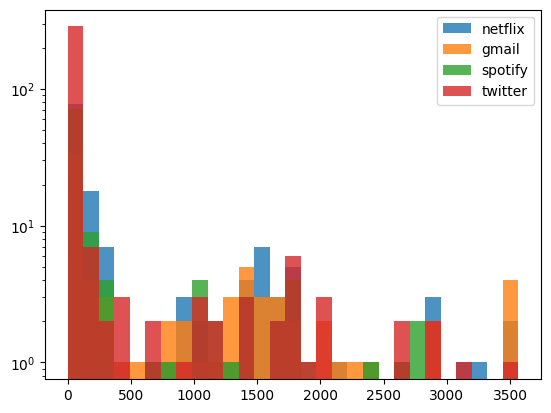

In [7]:
# 最大値と最小値の間をn_bin等分した幅でヒストグラムの棒を表示するように設定（各targetのbin幅を統一する）
n_bin = 30
x_max = flow_data['ss_time'].max()
x_min = flow_data['ss_time'].min()
bins = np.linspace(x_min, x_max, n_bin)

# histgramの作成. データの分布を確認
for service in flow_data.service.unique():
  plt.hist(flow_data[flow_data['service'] == service]['bytes_r'], bins=bins, log=True, label=service, alpha=0.8)
plt.legend()

<Axes: ylabel='Frequency'>

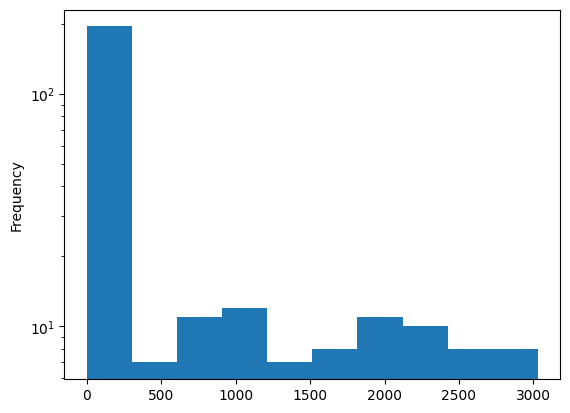

In [8]:
# gmailの分布が直感的におかしい？
flow_data[flow_data['service'] == 'gmail']['ss_time'].plot(kind='hist', logy=True)

In [9]:
flow_data[flow_data['service'] == 'gmail'].describe()

,proto,bytes_r,bytes_r_max,bytes_s,bytes_s_max,pkts_r,pkts_r_max,pkts_s,pkts_s_max,count,ss_time
count,277.000000,2.770000e+02,2.770000e+02,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000
mean,6.516245,8.012231e+04,6.549679e+04,22614.527076,14881.285199,139.407942,94.819495,99.595668,64.429603,1.700361,508.462560
std,2.330622,2.839582e+05,2.817040e+05,45062.257342,35577.036373,295.570223,266.624573,176.342744,151.683761,1.248376,859.335654
min,6.000000,0.000000e+00,0.000000e+00,52.000000,51.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,2.436000e+03,2.436000e+03,1692.000000,1682.000000,8.000000,8.000000,9.000000,9.000000,1.000000,0.125931
50%,6.000000,1.270400e+04,1.181700e+04,6246.000000,5862.000000,29.000000,29.000000,35.000000,32.000000,1.000000,10.875784
75%,6.000000,6.473000e+04,3.613500e+04,24559.000000,12402.000000,151.000000,76.000000,116.000000,67.000000,2.000000,718.482615
max,17.000000,3.374152e+06,3.374152e+06,325383.000000,325383.000000,2926.000000,2926.000000,1880.000000,1880.000000,7.000000,3029.380358


In [10]:
flow_data[flow_data['service'] == 'gmail'].sort_values('ss_time', ascending=False)[:10]
# open_emailしている間はセッションは切れずに継続する？

,srcip,dstip,proto,bytes_r,bytes_r_max,bytes_s,bytes_s_max,first,last,pkts_r,pkts_r_max,pkts_s,pkts_s_max,count,activity,ss_time,service
1381,10.145.43.25,172.217.12.69,6,63270,18214,45570,12490,02:39.1,53:08.5,213,59,140,41,4,"['open_email', 'open_email', 'open_email', 'op...",3029.380358,gmail
1379,10.145.43.25,172.217.1.129,6,128697,39996,26842,7232,02:41.9,53:08.4,285,82,271,72,4,"['open_email', 'open_email', 'open_email', 'op...",3026.490400,gmail
1531,10.146.66.8,172.217.12.37,6,259546,146055,267051,135299,02:12.2,50:48.7,1087,551,627,314,2,"['open_email', 'open_email']",2916.508032,gmail
1430,10.145.43.25,172.217.12.69,6,249322,153541,88625,18521,07:38.7,55:49.8,513,185,314,104,7,"['open_email', 'open_email', 'open_email', 'op...",2891.034414,gmail
1429,10.145.43.25,172.217.1.129,6,178945,34938,43902,6452,07:42.5,55:49.7,450,70,445,67,7,"['open_email', 'open_email', 'open_email', 'op...",2887.247258,gmail
1533,10.146.66.8,172.217.9.129,6,66745,33456,12862,6541,03:39.5,50:48.6,136,69,122,63,2,"['open_email', 'open_email']",2829.126467,gmail
1375,10.145.167.113,172.217.2.229,6,81573,18394,58404,12730,04:33.7,51:09.6,276,61,183,44,5,"['open_email', 'open_email', 'open_email', 'op...",2795.923809,gmail
1373,10.145.167.113,172.217.12.33,6,146000,39674,37576,8022,04:36.4,51:09.6,334,78,328,73,5,"['open_email', 'open_email', 'open_email', 'op...",2793.139974,gmail
1364,10.145.43.25,172.217.12.69,6,97852,17923,70486,12774,02:00.5,47:03.5,332,60,218,46,6,"['open_email', 'open_email', 'open_email', 'op...",2702.955108,gmail
1361,10.145.43.25,172.217.1.129,6,127465,33260,30502,6376,02:03.4,47:03.5,311,68,307,66,5,"['open_email', 'open_email', 'open_email', 'op...",2700.105670,gmail


# 入力データの作成

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
flow_data.columns

Index(['srcip', 'dstip', 'proto', 'bytes_r', 'bytes_r_max', 'bytes_s',
       'bytes_s_max', 'first', 'last', 'pkts_r', 'pkts_r_max', 'pkts_s',
       'pkts_s_max', 'count', 'activity', 'ss_time', 'service'],
      dtype='object')

In [13]:
use_feats = [
    'bytes_r',
    'bytes_r_max',
    'bytes_s',
    'bytes_s_max',
    'pkts_r',
    'pkts_r_max',
    'pkts_s',
    'pkts_s_max',
    'count',
    'ss_time'
]

target = 'service'

In [14]:
X_train, X_test, y_train, y_test = train_test_split(flow_data[use_feats], flow_data[target], test_size=0.2, random_state=42, shuffle=True)

In [15]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2509, 10)
(2509,)
(628, 10)
(628,)


# モデルの学習/評価

## ランダムフォレスト

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [17]:
# モデルのインスタンスを生成
clf = RandomForestClassifier(max_depth=8, random_state=0)

# 学習
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [18]:
# モデルの評価
pred = clf.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"正解率：{score * 100}%")
# まだまだ低い、、ハイパーパラメータ調整 (optuna) をすることで改善できる？

正解率：79.93630573248409%


In [19]:
# 混同行列で評価
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       gmail       0.63      0.52      0.57        50
     netflix       0.83      0.91      0.87       272
     spotify       0.66      0.40      0.50        73
     twitter       0.82      0.86      0.84       233

    accuracy                           0.80       628
   macro avg       0.73      0.67      0.69       628
weighted avg       0.79      0.80      0.79       628



## LightGBM

In [20]:
import lightgbm as lgb

In [21]:
# モデルのインスタンスを生成
model = lgb.LGBMClassifier(boosting_type='gbdt', max_depth=8, random_state=0)

# 学習
model.fit(X_train, y_train)

LGBMClassifier(max_depth=8, random_state=0)

In [22]:
# モデルの評価
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print(f"正解率：{score * 100}%")

正解率：81.36942675159236%


In [23]:
# 混同行列で評価
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       gmail       0.56      0.64      0.60        50
     netflix       0.88      0.88      0.88       272
     spotify       0.65      0.47      0.54        73
     twitter       0.84      0.88      0.86       233

    accuracy                           0.81       628
   macro avg       0.73      0.72      0.72       628
weighted avg       0.81      0.81      0.81       628



<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

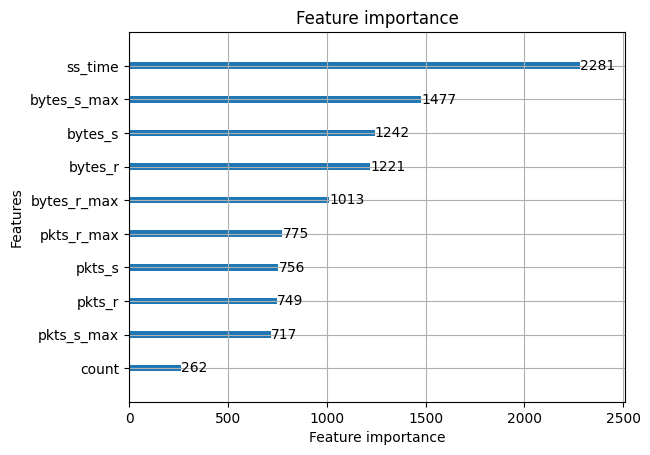

In [24]:
# モデルの予測に寄与した特徴量ランキング
lgb.plot_importance(model)